# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [5]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)


# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:**

Increasing RM would be directly correlated to increasing value of house prices. A house that resides in a neighbourhood with a high average number of rooms would increases the statistical possibility that the house being considered has many rooms and thus an increased worth. Additionally houses situated in a high value areas will see increased prices purely by association of local geography in an expensive neighbourhood. 

Decreasing LSTAT would be inversely correlated with increasing value of house prices. Increased crime levels associated with low income areas would decrease the potential valuation of a house. Additionally houses situated in lower value areas will see decreased prices purely by association of local geography in a poor neighbourhood. 

Decreasing ratio of students to teachers would be inversely correlated with increasing value of house prices. A lower ratio would suggest that home owners children would benefit from smaller class sizes and easier access to schools of their choice in the local area. Schooling options would be considered an important consideration for perspective home owners. 



----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

Given that a set of perfect predictions would yield an R2 score of 1, the result of 0.92 should be considered highly accurate. Inspection of the results shows that the model appears to predict fairly precise values that track the trend within the true value data. Each predicted value is close enough to its actual true so that no large variance is introduced. Yielding an R2 score of 0.923 implies that 92.3% percent of the variance within true values can be predicted from the model. A model operating with this level of performance would appear to have successfully captured variation of target variables. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=3)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Training the model against all the data could lead to overfitting. Without splitting the model may just memorise the entire data set, this would lead to high scores when evaluating model performance against training data, however the model may then begin to perform poorly when asked to predict a value that did not appear in the original dataset. This is indicative of a model not generalising well because it has become too specific, also known as an error through variance. This problem can be elevated by splitting the data into a set that is used for training and a set used for testing only. The model can see and learn from training data whereas the model must not learn from the testing data otherwise we may end up with overfitting, the testing data is used to evaluate performance of the model against data it has not been trained with, this should help us ensure the model generalises well. One consideration when splitting our data into a training/testing ratio is that if we do make our training set sufficiently large enough then the model will not be able fully learn the general trends of the underlying data, this could result in too simplistic a model and a cause of underfitting. This is also known as an error through bais. In summary splitting the dataset into separate training and testing sets allows us to develop models that can generalise well with the ability to evaluate performance metrics in relation to the testing set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

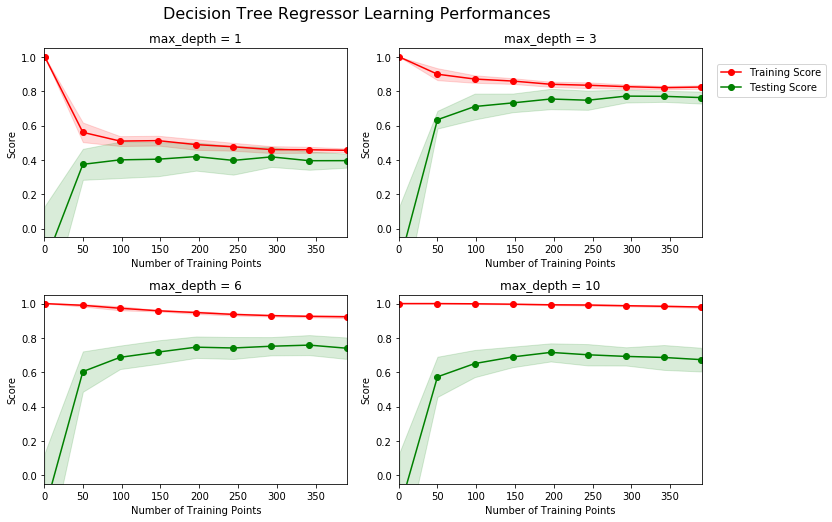

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

max_depth = 10 

The training curve remains fixed at 1.0 throughout the increasing number of points. An R2 score of 1.0 suggests that the model can perfectly predict all the points from the training set. As more points are added this trend holds and the model seems invariant to the number of points added, I would suggest if more points were added to the training set the model would still return a very high R2 score. The testing score for the model starts off low, this is to be expected because the model could not be trained very accurately with a small number of points. The trend of the curve suggests the accuracy of the model improves with more points until it reaches about 150 points. At this point the testing curve appears to plateau and subsequently adding more points does not yield an improvement in accuracy of testing data. This pattern draws two lines that are not appearing to converge despite more points being added to the training and testing sets. This particular model seems to exhibit signs of overfitting, the model appears to memorise the training set, hence the high R2 scores and then subsequently fails to generalise well for the testing data, this is the cause of the gap between the learning curves that would diminish with a better model. Due to the overfitting nature I would not expect more points to benefit the model. 



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

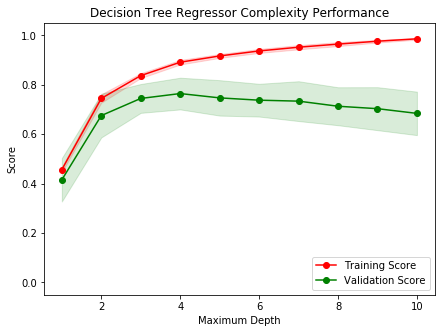

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

The model trained with ‘max_depth=1’ suffers from high bias. Initially adding more training points improves the score of testing score, although at the detriment to the training score. As more points are added training score continues to degrade, while the testing score does improve slightly it eventually plateaus and the two curves begin to converge at around 0.5. The converged score indicates the model isn’t that accurate, this expected from a model which makes many errors, caused in this case by underfitting. The lack of improvement in testing coupled with worsening accuracy of training indicates the model maybe too simplistic and thus suffers from high bais. 

Whereas the model trained with ‘max_depth = 10’ exhibits signs of overfitting and thus suffers from high variance. The perfect R2 training score indicates the model is memorising the training data set, which causes issues when attempting to generalise and predict results based on the testing data. The large gap between training and testing curves is a sign of overfitting and illustrates that adding further points probably won’t improve the model. A better performing model would converge the training and testing curves. 


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **


I believe that the model trained with maximum depth = 4 would best generalise to unseen data. This correlates well to the maximum depth results show in question 5. A small max depth parameter of 1 yields an underfitted model while 10 creates an overfitted model, therefore we can assume the a model that generalises well sits between this range. The complexity curve generated from training and validation sets suggests the optimal configuration is 4 which has the highest validation score for a fairly accurate training score. Selecting a max depth which yields a higher training score could begin to overfit the model due to increased complexity. While reducing the max depth to 3 creates lower accuracy score. Therefore I think 4 is the optimal hyper parameter for this case. 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Grid search is a technique used to evaluate which model is performing best for a given set of configured hyperparameters. The grid aspect of this technique refers to a table like structure that is built with hyperparameters and various values of those parameters that the technique will evaluate. The technique then trains various models using the requested hyper parameter configurations, the performance of each model will be evaluated against the validation set. The optimal performing model will be selected as the result of the grid search. This process allows us to test, evaluate and select the best model across a matrix of configuration parameters used to tune models.   

The ‘max_depth’ hyper parameter within DecisionTreeClassifier can be evaluated with Grid Search. A series of values e.g (1, 2 ,3 ...10) could be specified to configure the associated max depth of  each decision tree built by training the model. The Grid Search technique will then train a model for each value of the max depth hyperparameter. Once this has completed, the technique would then score the performance of each model against a validation set. The result of the technique would be the best performing model within the matrix of parameter configurations created by the Grid Search technique. If we were attempting to train a model for a particular dataset with a decision tree classifier then we could use the Grid Search technique to iterate through a series max depth hyperparameters in order to find a model that provides a good fit without too much bias or variance.   





### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

The selection of well performing model should not be based on the test data set as you would then be intentionally choosing a model that you know will perform accurately on the testing set, however in doing this knowledge about the testing set has formed part of your decision on the best method to train your model. This may lead to model that overfits which will not generalise well when presented with unseen data not in the testing set. The sklearn KFold documentation cites this problem “knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance”. The solution, use a validation set to assess the performance models that has not been used for training and is independent from the testing set, so as not to corrupt the result. This process requires us to partition the training data into two chunks, one to train and one to validate. In order to maximise the data available to us that can train models we use the k-fold cross-validation technique. This requires us to split the training and validation set into k buckets of data, where k is nominal value that denotes the size of each bucket. Given a combined training and validation set of size 30 with k=6 we would create 6 chunks that each contain 5 data points. In this example the model is then trained 6 times, each time one chunk of 5 data points is separated to evaluate the performance of model and the other k-1 buckets used to train the model. The performance of each model is then averaged over the combinations of k buckets that have been generated. This. As referred to in the docs this technique maybe computationally expensive because we train and evaluate many models with possibly many combinations of training/validation data, however it ensures we use maximises the amount of data used to train and validate model performance without resorting to testing data to inform decisions about model training. With respect to the Grid Search technique, k-fold cross-validation would maximise the amount of data available to train models. This would allow us to select the most performant model from the matrix of hyperparameter configurations while ensuring the best estimated model hasn’t been corrupted with knowledge of performance on the testing data. The final step would be to run the trained model against the test set and ensure we maintained a good level of performance compared to our training/validation sets. It’s worth noting that running k-fold validation on each cell of the grid search matrix could generate a large number of models and could become quite computationally expensive. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)     

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 7, 8, 9, 10] }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** 

The optimal model has a max_depth of 4. This result correlates well to my best estimate from question 6. The learning curves had indicated that optimal max depth would be around close to 4 looking at the underfitting/overfitting from decreasing/increasing the depth respectively. The complexity curve then indicated that 4 was the optimal value which has been corroborated with this result.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [13]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Minimum price: $105000.0
# Maximum price: $1024800.0
# Mean price: $454342.9447852761
# Median price $438900.0
# Standard deviation of prices: $165340.27765266784

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $424,684.62
Predicted selling price for Client 2's home: $233,450.00
Predicted selling price for Client 3's home: $896,280.00


**Answer: **

Evaluating the model predictions for the prospective client house prices I would say the model gives a mediocre/poor estimate. For client number 2 whom we can assume to have the lowest value house with the given information, the estimated price is over double the minimum price from our dataset. Assuming the minimum price value should be comparable with the house of client 2 then we can conclude this low end estimation is not very accurate. 
Similarly the highest value house of client 3 should be comparable with the max price from the original dataset. However a difference of \$128,520.00 exists between these two data points. This value is a significant margin of error and shows the model has difficulty accurately estimating prices near both the high and low ends of the data set. 
However it should be noted the client 1, whom we can assume has a mid range value house given the information, has a far more accurate prediction compared to the mean and median values which should correlate to the middle of the dataset. Of the two metrics, median is probably the most sensible to use in this case as it is influenced to a lesser degree by outliers in the data. 

While the estimated prices seem reasonable in that the most valued house is predicted to sell for more than the medium and low value houses, I would be concerned by the accuracy of estimation for client 2 and 3 in comparison with the actual max and min prices in the dataset.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


In [15]:
rp = np.array([ 391183.33,
419700.00,
415800.00,
420622.22,
413334.78,
411931.58,
399663.16,
407232.00,
351577.61,
413700.00 ])


(69044.61 / rp.mean()) * 100

17.070202314970349

**Answer: **

The data collected from 1978 could still be useful given a set of caveats. Provided the data has been properly scaled for inflation as stated in the introduction to this project the monetary worth should be equivalent to value today. However if the housing market has become more/less competitive since 1978 then the trends we would see today maybe massively different to that of the historic dataset. If there is proportionally less housing available in today’s market than there were 1978 then it could unevenly drive up house prices particularly at the bottom end of the market. With this in mind the data should be treated as not wholly comparable with data produced more recently, but it still provides a set of data points in the Boston housing market so it would be irresponsible to fully discount it.


In reality the model is probably too simplistic, more variables within the dataset would be required to fully capture the response of price per house. Amenities (e.g hotub, swimming pool), square feet of land and projected future development in the local area would all hugely impact the potential worth of a property. Given this information I would expect the model to underfit as it likely does not fully model the relationship of price from the 3 distinct properties we are currently analysing. As previously discussed the model appears to struggle with estimating data that we would expect to sit at the edges of low/high prices. Additionally the range of values produced in the sensitivity trails would indicate the model is not that stable. From the mean value of prices produced in the predicted trails \$404,474.47, the range of \$69,044.61 equates to 17% of the total value, this amount of variation in prices is too large to be considered an accurate stable predication.  


Attempting to repurpose the model to predict house prices for that in rural area when it has been trained against urban data would most likely result in predications that are very inaccurate. There are many factors such as increased property worth in a city location, far greater square feet of land for a given price of a house in a rural environment that would distort our modelled predictions. One concrete example for the model we have trained would be the ratio of students to teachers in rural areas would be far lower due to the spread out geography of properties, although this would likely have less of an effect on house price when compared to an urban environment. Using the Boston dataset to train a model that will estimate prices in a completely different type of environment would likely lead to a drop in model accuracy and is probably not that applicable. 

I do not think it would be valid to calculate an individual house price from information only pertaining to the general neighbourhood. To provide a truly accurate prediction for a particular house, its attributes must be considered on a case by case basis. A concrete example would be a property with a small number of rooms in an expensive neighbourhood, while price would certainly be influenced from the expensive houses in the vicinity, a lack of desirable features would inevitably lower it's worth and this may be missed by our model if it is only concerned with the majority of houses in the area that have many more rooms. However the model could be useful if used in a particular capacity, generation of an initial rough price prediction in the local area, from this an estate agent could apply their expertise in order to generate a more precision estimation per property basis.

There are a number of reasons discussed above that would lead me to conclude that the trained model produced in this project is not appropriate for use in a real world scenario. In order to improve the model I believe it should be trained on a more recent dataset with an increased number of variables that would help to better model the response of price to a given set of features. Trained against neighbourhood characteristics only the model could provide some insight for an estate agent to give them a rough guide price but it would still require their expertise to produce an accurate estimate. Training the model to estimate price for a given house instead of neighbour could require a significantly more complex approach in order to effectively model the data. 




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.